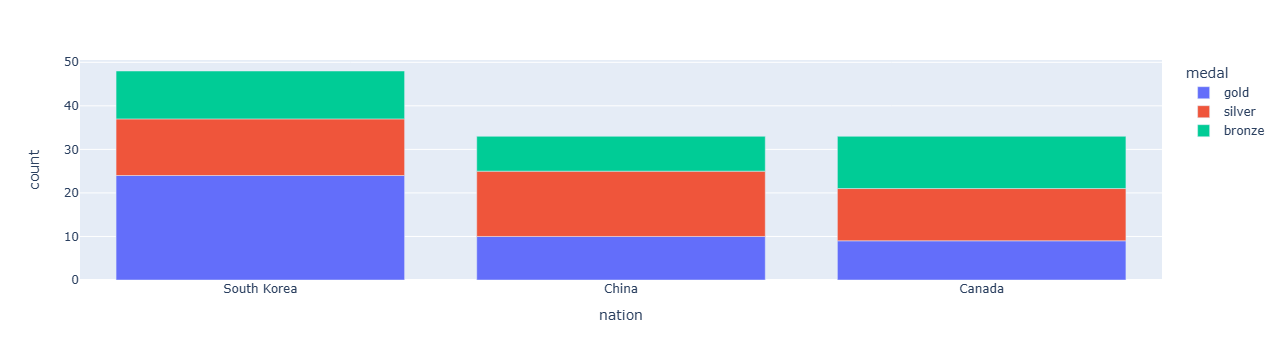

In [131]:
import plotly.express as px
df = px.data.medals_long()
# 1. 막대 그래프
px.bar(df, x="nation", y="count", color="medal")


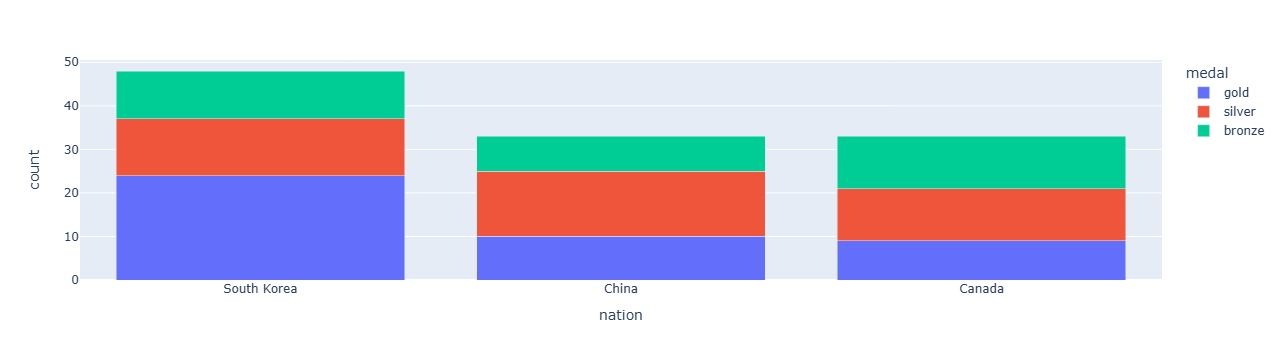

In [74]:
# 2. 누적 막대 그래프
px.bar(df, x="nation", y="count", color="medal", barmode="stack")

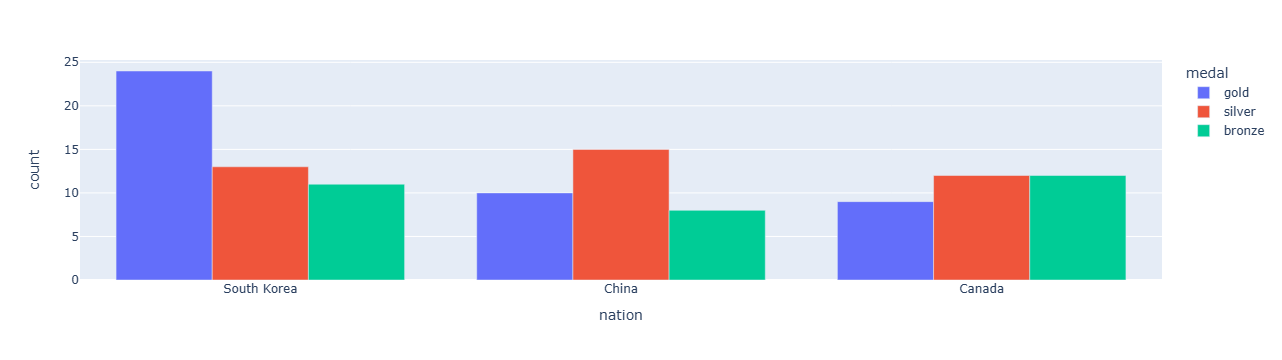

In [75]:
# 3. 그룹 막대 그래프
px.bar(df, x="nation", y="count", color="medal", barmode="group")

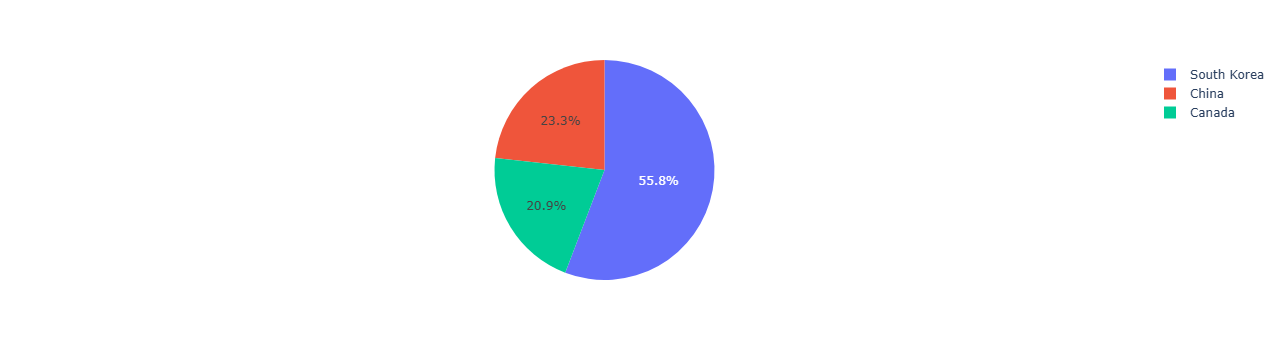

In [27]:
px.pie(df[df["medal"]=="gold"], names="nation", values="count")

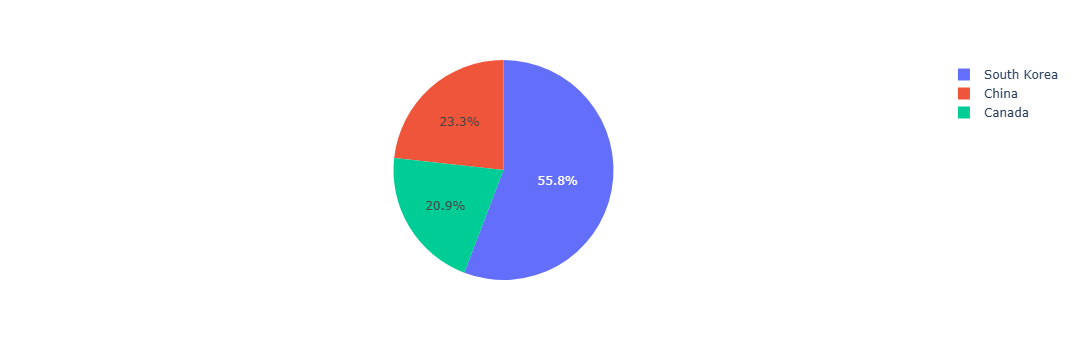

In [76]:
# 4. 파이 차트 (금메달)
px.pie(df[df["medal"]=="gold"], names="nation", values="count")

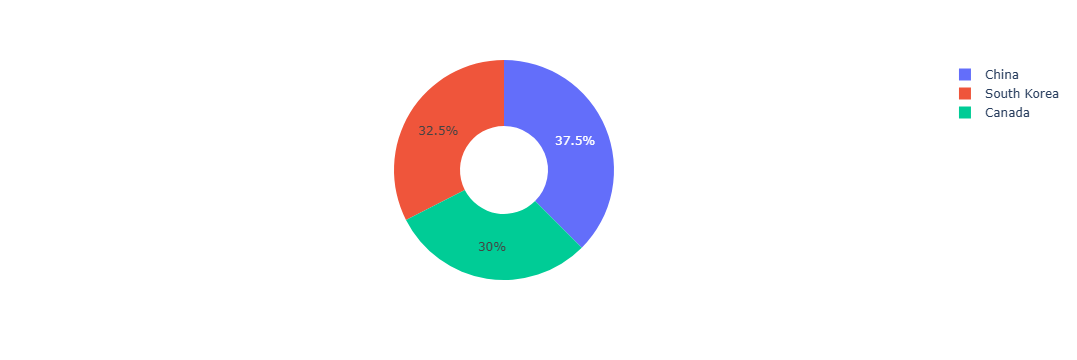

In [77]:
# 5. 도넛 차트 (은메달)
px.pie(df[df["medal"]=="silver"], names="nation", values="count", hole=0.4)

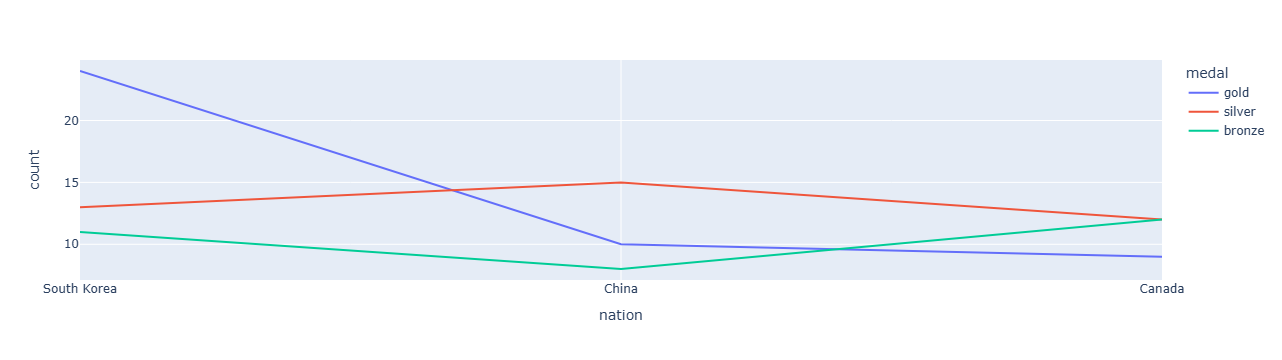

In [79]:
# 6. 선형 그래프
px.line(df, x="nation", y="count", color="medal")

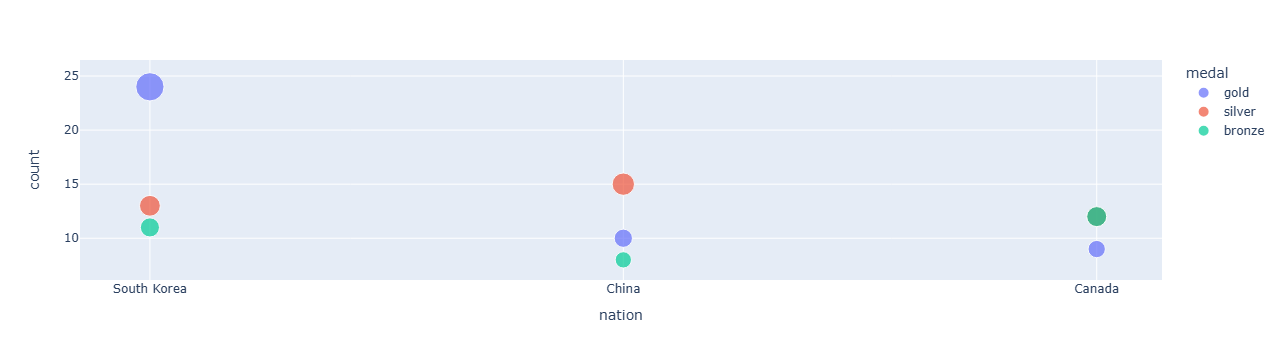

In [80]:
# 7. 스캐터 플롯
px.scatter(df, x="nation", y="count", color="medal", size="count")

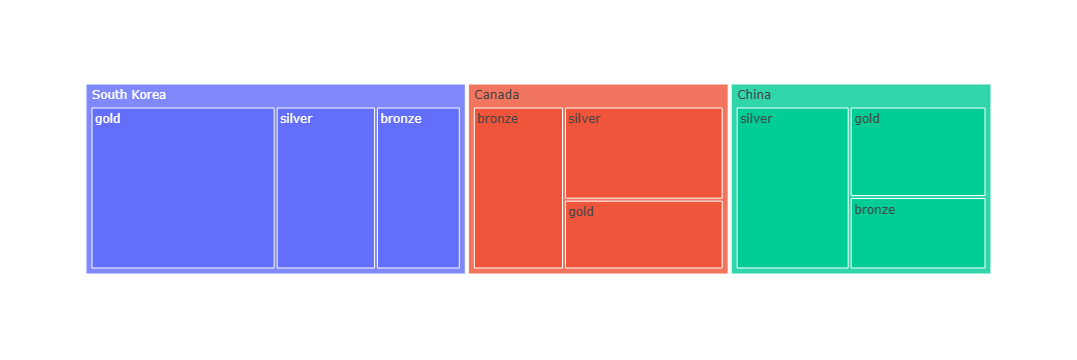

In [81]:
# 8. 트리맵
px.treemap(df, path=["nation", "medal"], values="count")

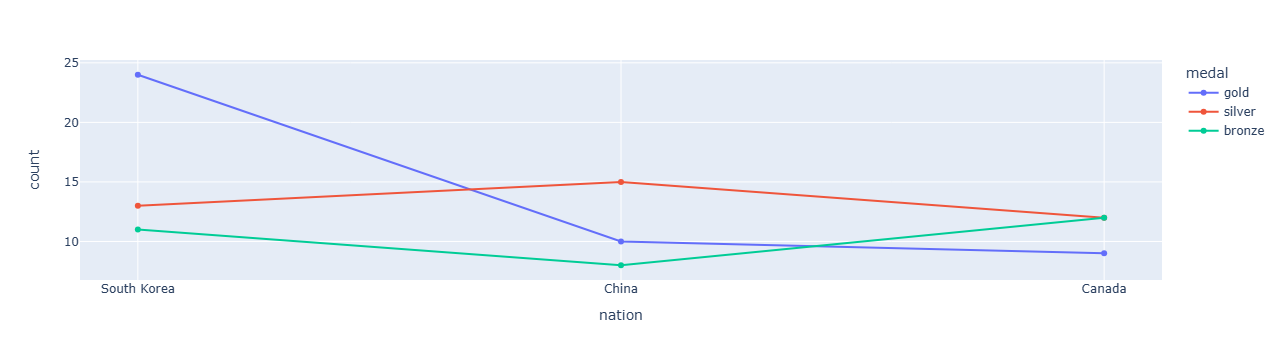

In [82]:
# 9. 선+마커 그래프
px.line(df, x="nation", y="count", color="medal", markers=True)

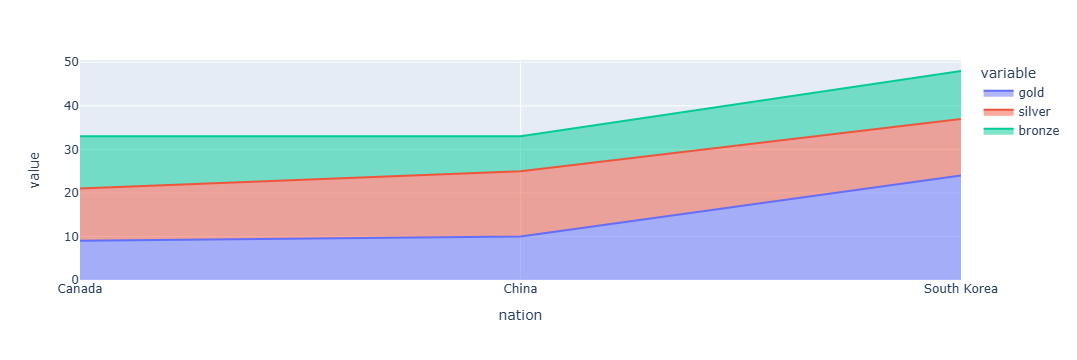

In [83]:
# 10. 누적 영역 그래프
df_pivot = df.pivot(index="nation", columns="medal", values="count").fillna(0)
df_pivot["nation"] = df_pivot.index
px.area(df_pivot, x="nation", y=["gold", "silver", "bronze"])

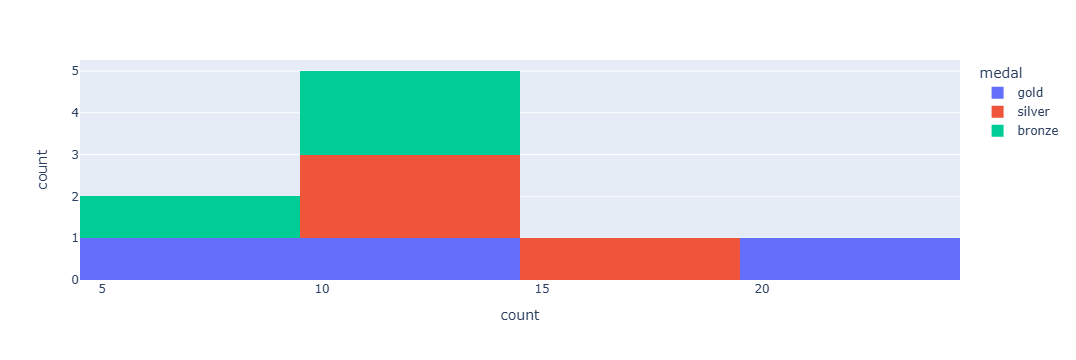

In [84]:
# 11. 히스토그램
px.histogram(df, x="count", color="medal")

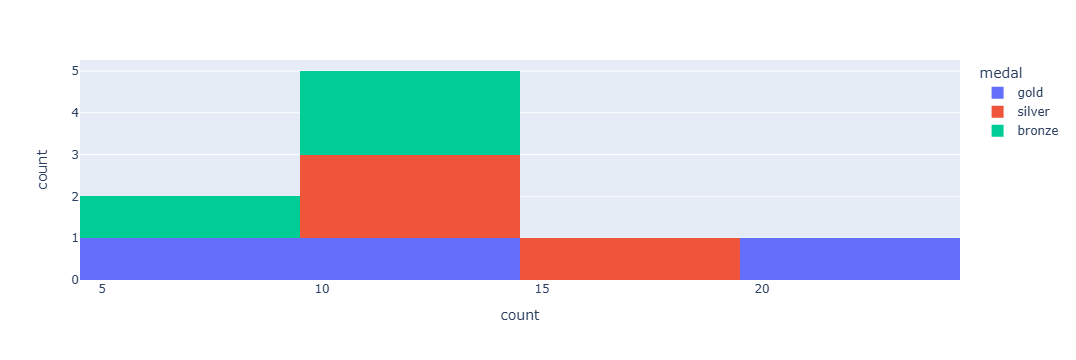

In [85]:
# 12. 누적 히스토그램
px.histogram(df, x="count", color="medal", barmode="stack")


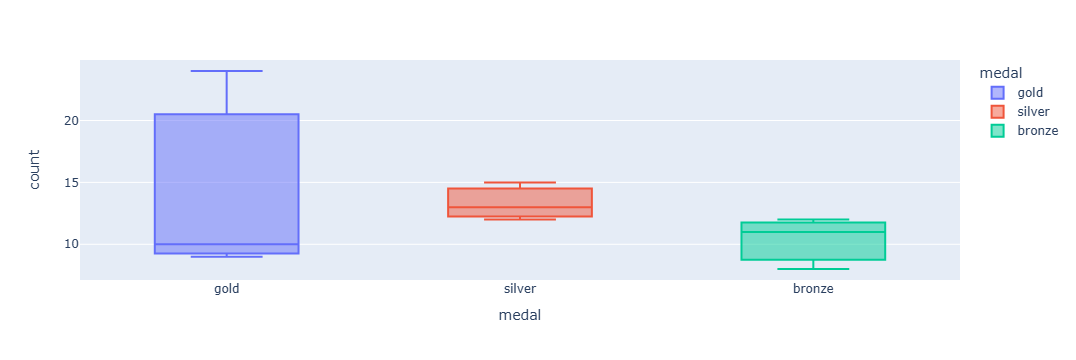

In [86]:
# 13. 박스 플롯
px.box(df, x="medal", y="count", color="medal")

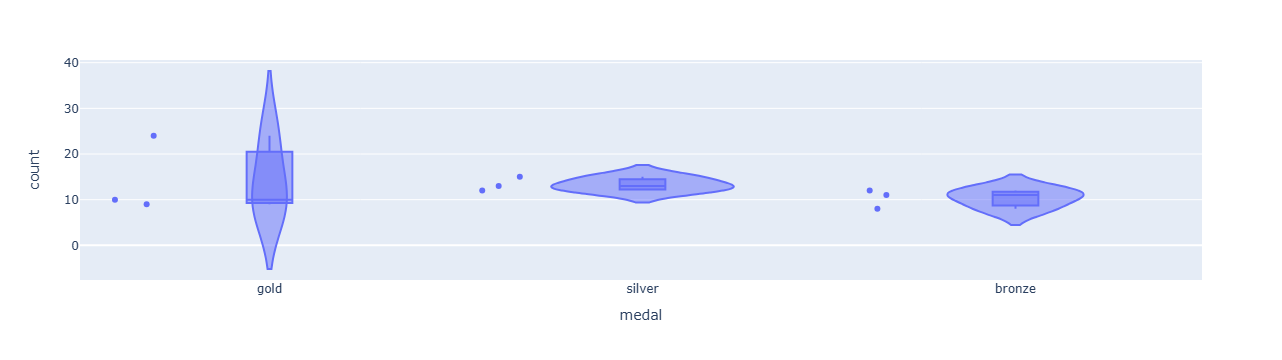

In [87]:
# 14. 바이올린 플롯
px.violin(df, x="medal", y="count", box=True, points="all")

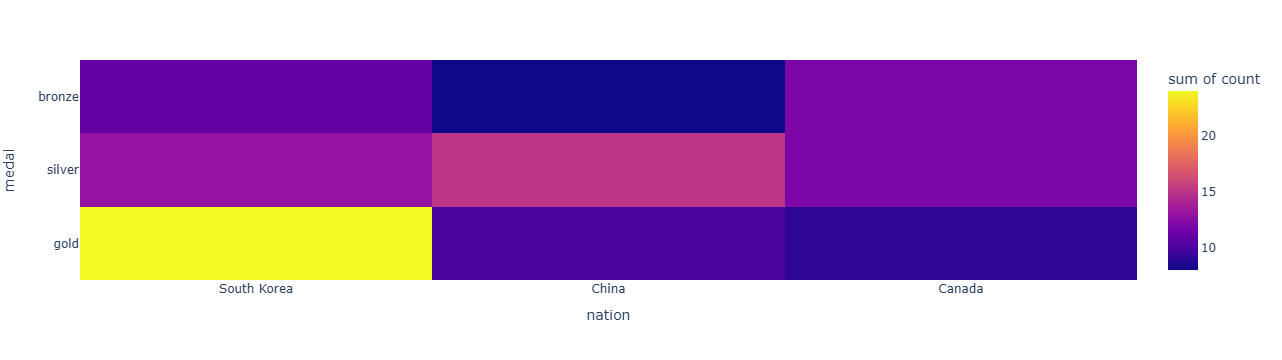

In [88]:
# 15. 밀도 히트맵
px.density_heatmap(df, x="nation", y="medal", z="count")

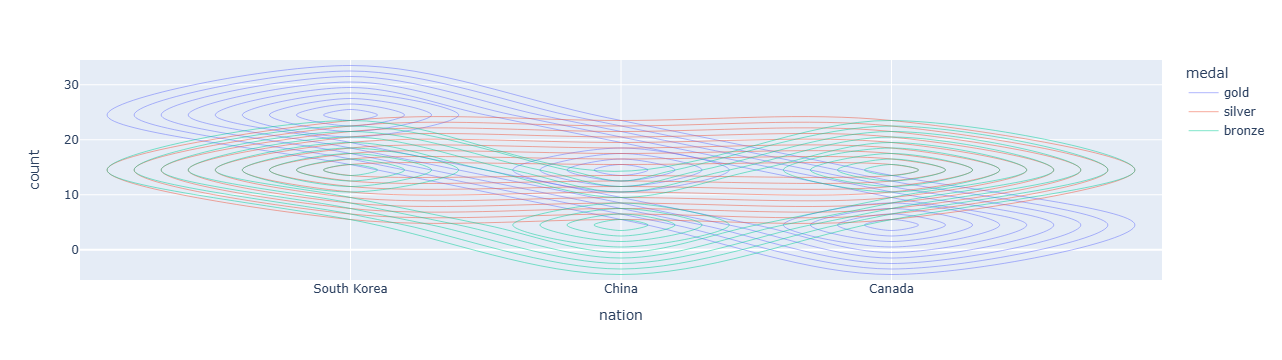

In [89]:
# 16. 밀도 등고선
px.density_contour(df, x="nation", y="count", color="medal")

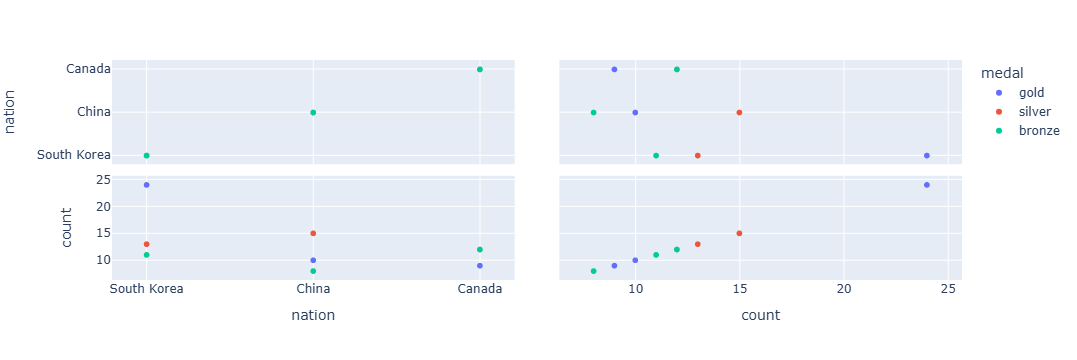

In [90]:
# 17. 스캐터 행렬
px.scatter_matrix(df, dimensions=["nation", "count"], color="medal")

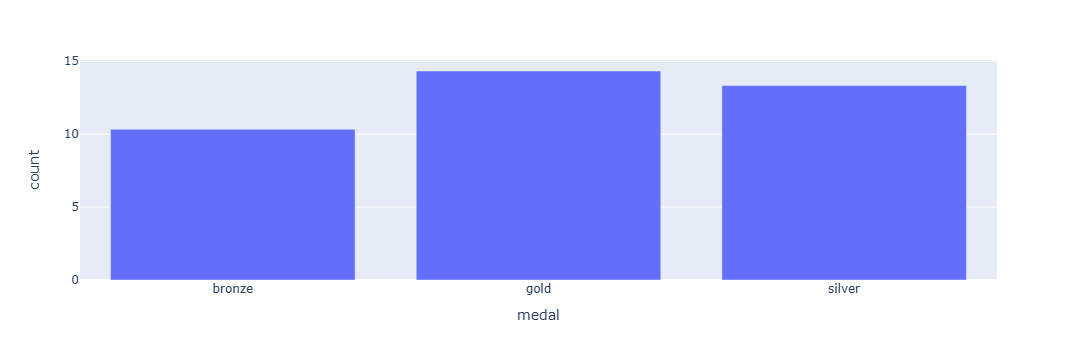

In [91]:
# 18. 카테고리별 평균값 막대
df_grouped = df.groupby(["medal"]).mean(numeric_only=True).reset_index()
px.bar(df_grouped, x="medal", y="count")

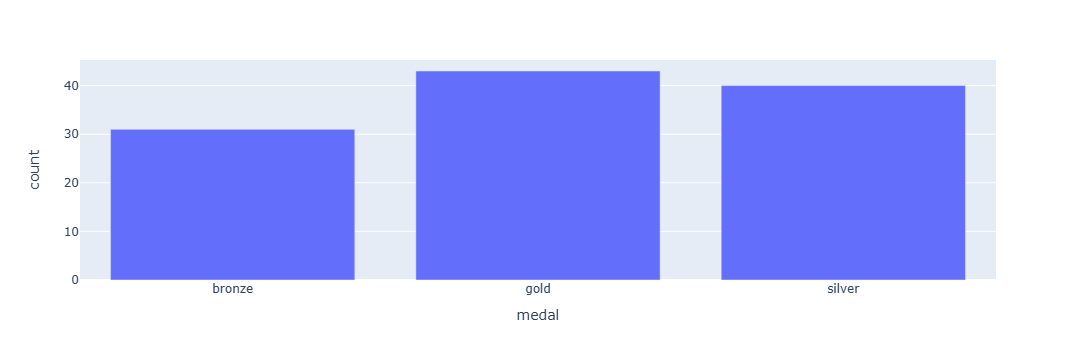

In [49]:
# 19. 카테고리별 합계 막대
df_sum = df.groupby(["medal"]).sum(numeric_only=True).reset_index()
px.bar(df_sum, x="medal", y="count")

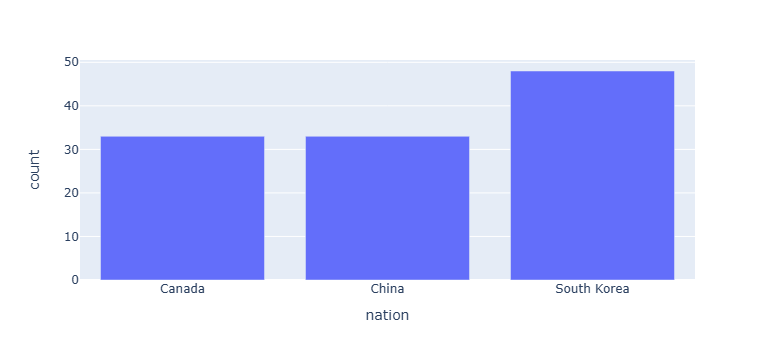

In [50]:
# 20. 국가별 총 메달 수
df_total = df.groupby("nation").sum(numeric_only=True).reset_index()
px.bar(df_total, x="nation", y="count")

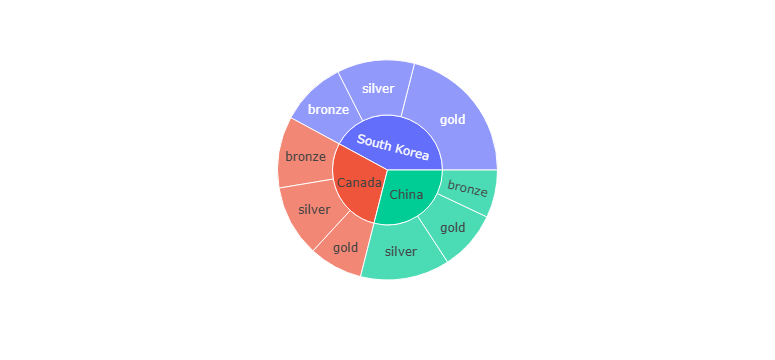

In [51]:
# 21. 썬버스트 차트
px.sunburst(df, path=["nation", "medal"], values="count")

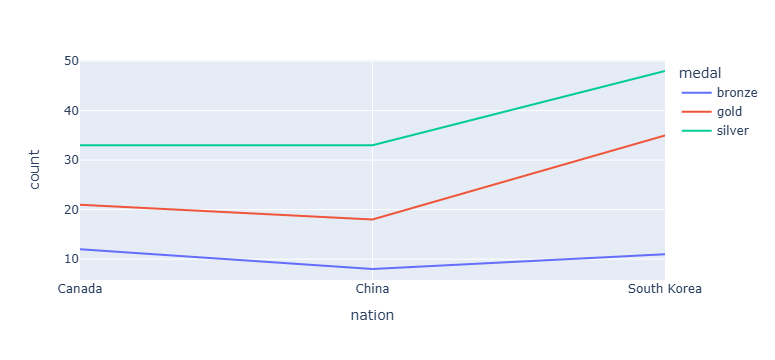

In [52]:
# 22. 누적 선형 그래프
df_cumsum = df.groupby(["nation", "medal"]).sum(numeric_only=True).groupby("nation").cumsum().reset_index()
px.line(df_cumsum, x="nation", y="count", color="medal")

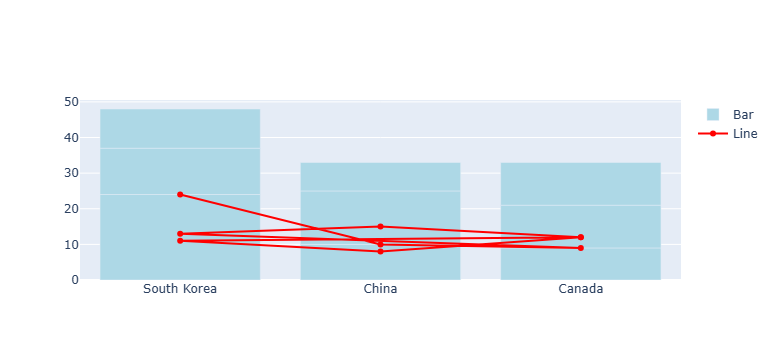

In [53]:
# 23. 막대+선 혼합
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Bar(x=df["nation"], y=df["count"], name="Bar", marker_color="lightblue"))
fig.add_trace(go.Scatter(x=df["nation"], y=df["count"], mode="lines+markers", name="Line", line=dict(color="red")))
fig.show()

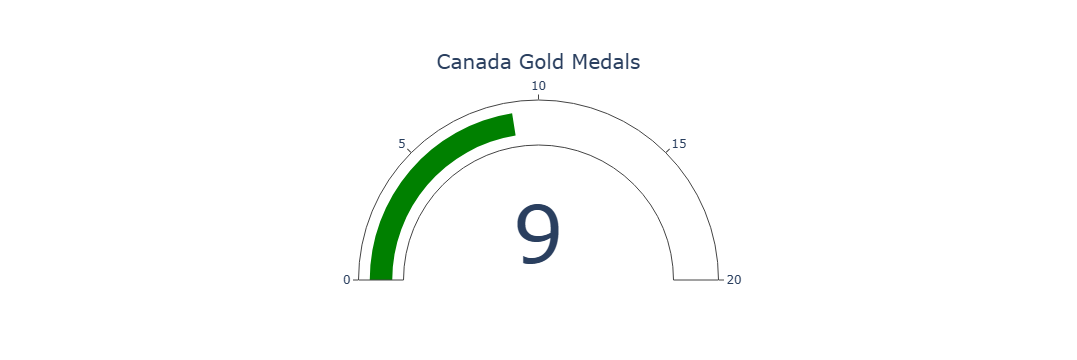

In [95]:
# 24. 게이지 차트
import plotly.graph_objects as go

canada_gold = df[(df["nation"]=="Canada") & (df["medal"]=="gold")]["count"].values[0]

fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=canada_gold,
    title={"text": "Canada Gold Medals"},
    gauge={"axis": {"range": [0, 20]}}
))
fig.show()


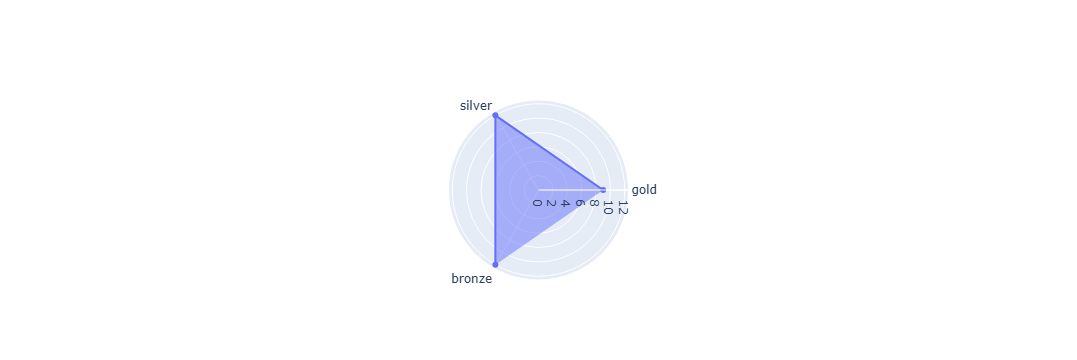

In [96]:
# 25. 레이더 차트
from plotly.graph_objects import Scatterpolar
df_radar = df[df["nation"]=="Canada"]
go.Figure(data=Scatterpolar(r=df_radar["count"], theta=df_radar["medal"], fill='toself')).show()

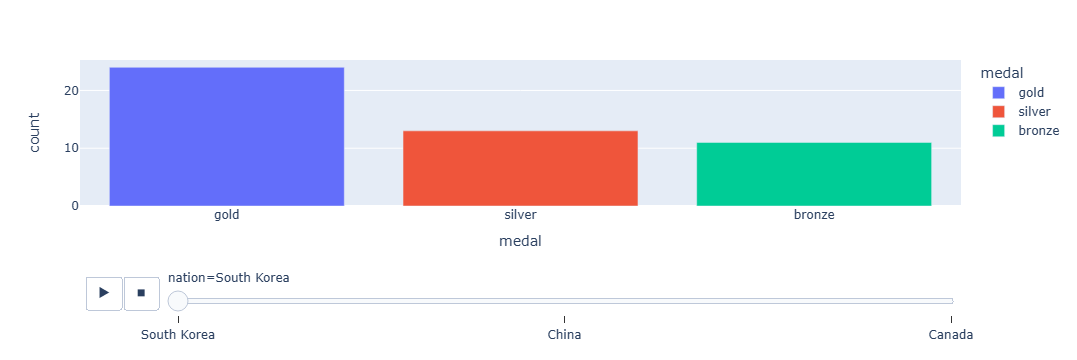

In [97]:
# 26. 애니메이션 (임의로 nation을 시간처럼 사용)
px.bar(df, x="medal", y="count", color="medal", animation_frame="nation")

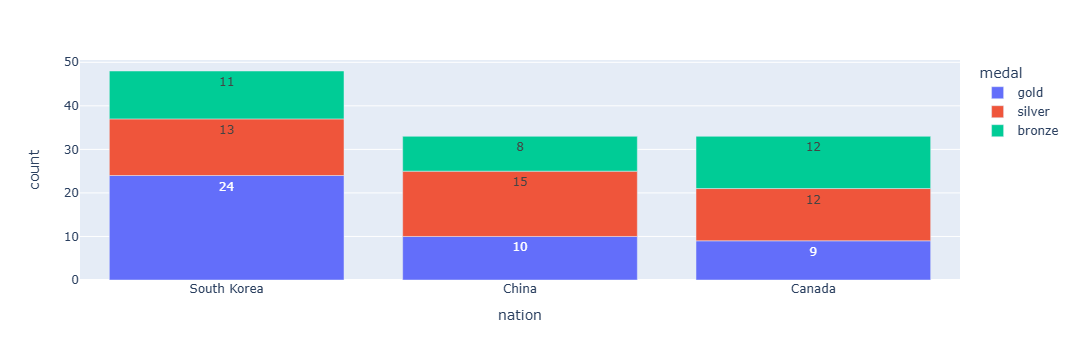

In [98]:
# 27. 텍스트 라벨 포함
px.bar(df, x="nation", y="count", color="medal", text="count")

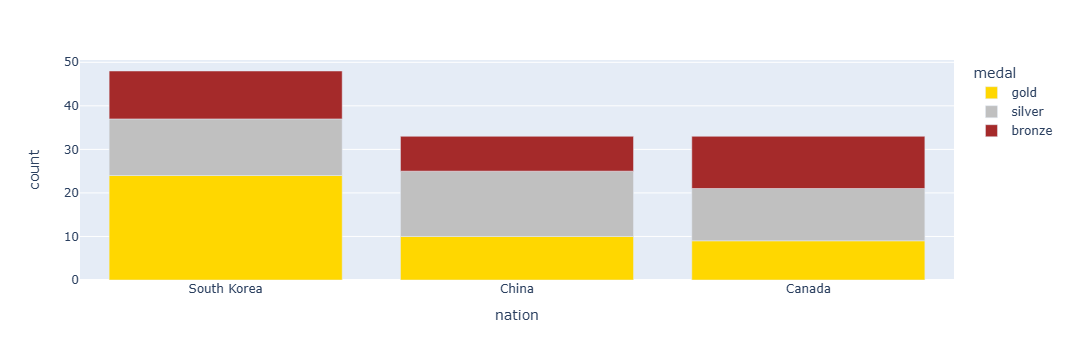

In [99]:
# 28. 색상 사용자 지정
px.bar(df, x="nation", y="count", color="medal", color_discrete_map={"gold":"gold", "silver":"silver", "bronze":"brown"})

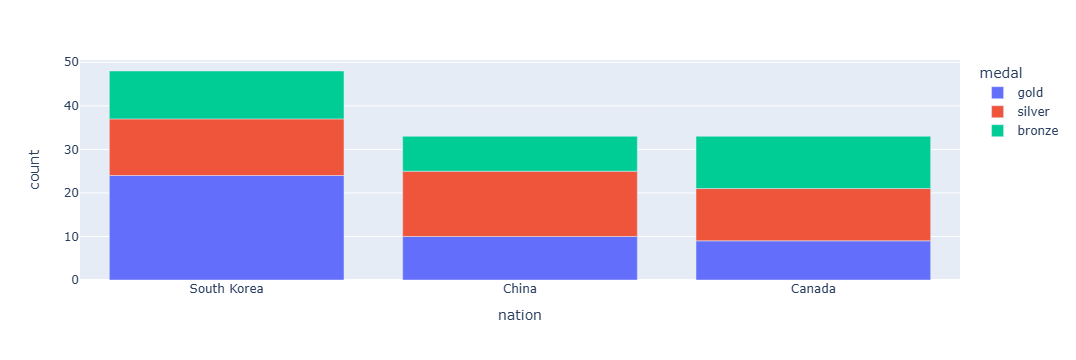

In [100]:
# 29. 정렬된 막대 그래프
df_sorted = df.sort_values("count", ascending=False)
px.bar(df_sorted, x="nation", y="count", color="medal")

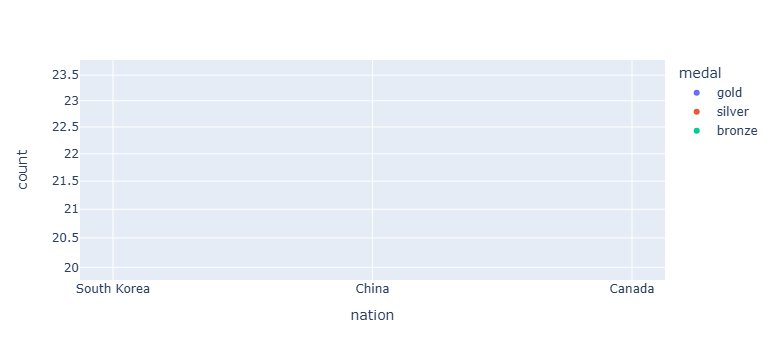

In [101]:
# 30. 로그 스케일
px.scatter(df, x="nation", y="count", color="medal", log_y=True)

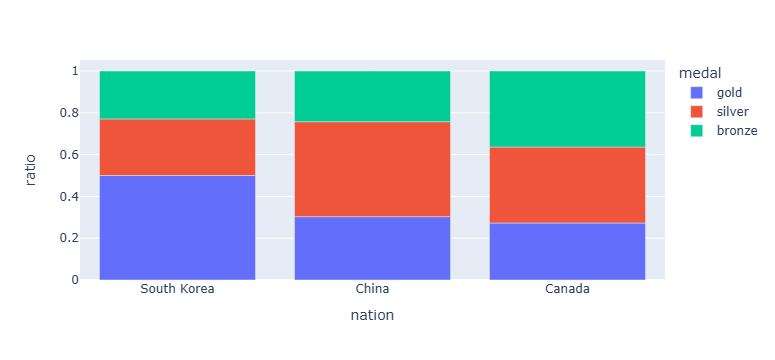

In [103]:
# 31. 국가별 메달 비율
df_ratio = df.copy()
df_ratio["total"] = df_ratio.groupby("nation")["count"].transform("sum")
df_ratio["ratio"] = df_ratio["count"] / df_ratio["total"]
px.bar(df_ratio, x="nation", y="ratio", color="medal")

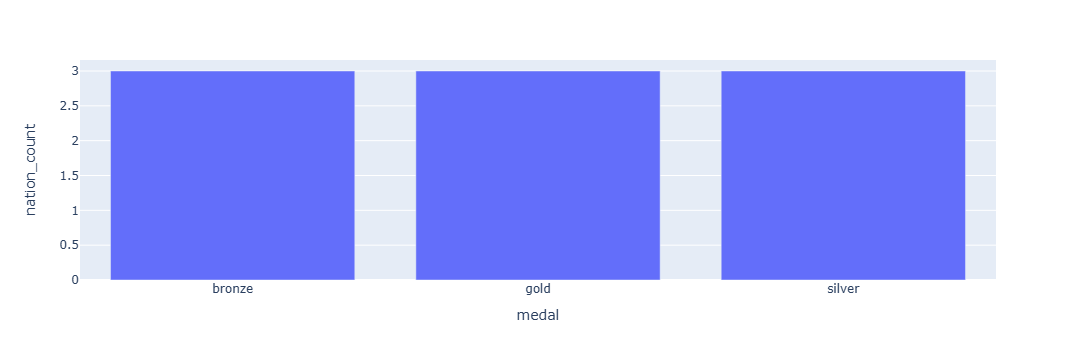

In [104]:
# 32. 메달별 국가 수
df_medal_count = df.groupby("medal")["nation"].nunique().reset_index(name="nation_count")
px.bar(df_medal_count, x="medal", y="nation_count")

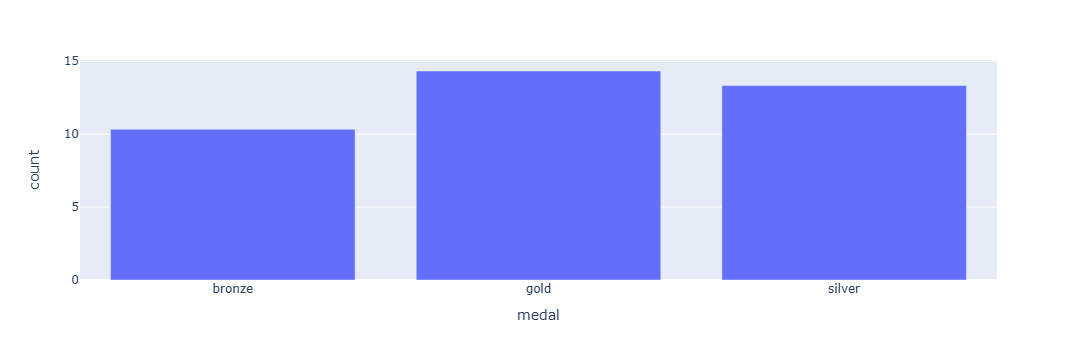

In [105]:
# 33. 메달별 평균 메달 수
df_avg = df.groupby("medal")["count"].mean().reset_index()
px.bar(df_avg, x="medal", y="count")

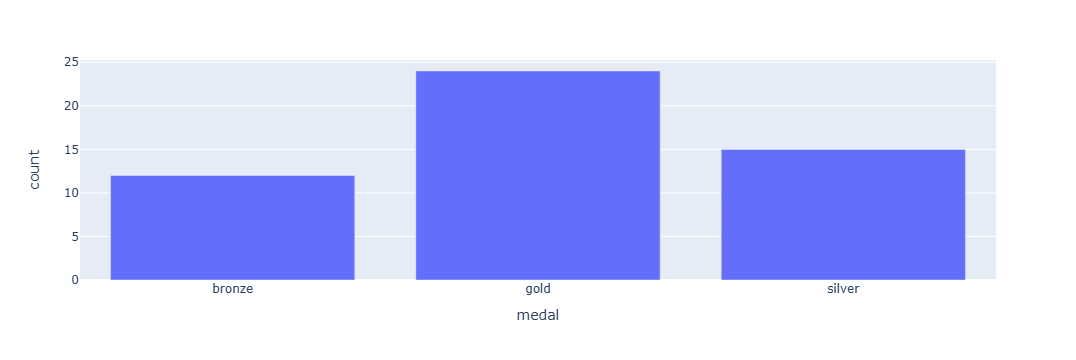

In [106]:
# 34. 메달별 최대값
df_max = df.groupby("medal")["count"].max().reset_index()
px.bar(df_max, x="medal", y="count")


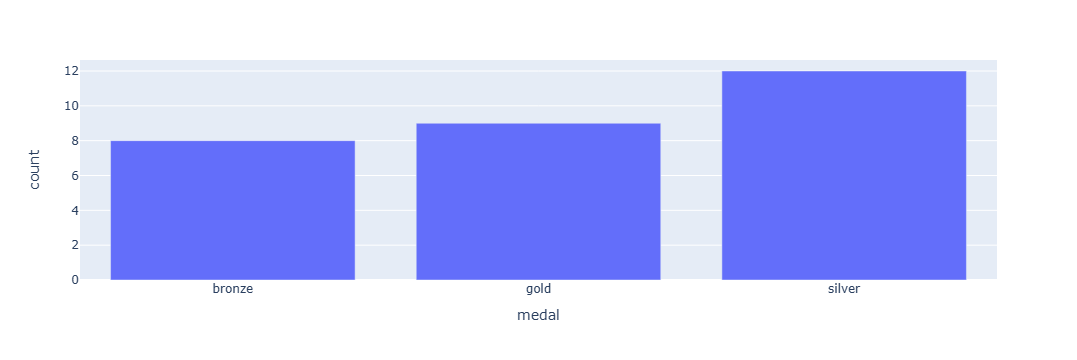

In [107]:
# 35. 메달별 최소값
df_min = df.groupby("medal")["count"].min().reset_index()
px.bar(df_min, x="medal", y="count")

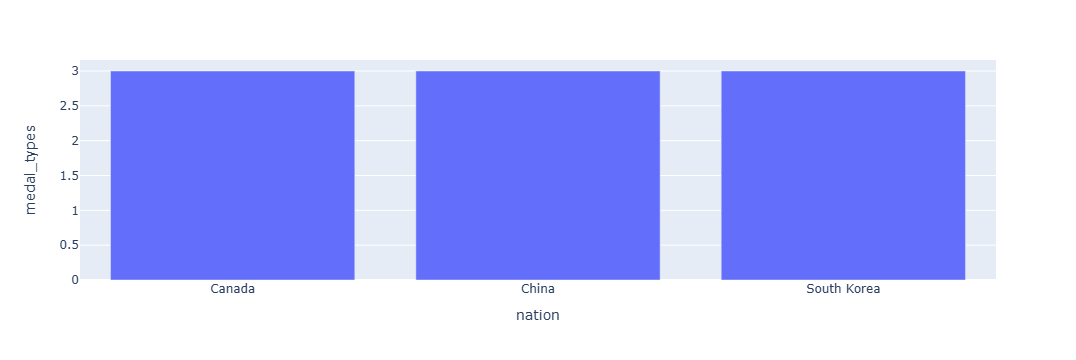

In [109]:
# 36. 국가별 메달 종류 수
df_kind = df.groupby("nation")["medal"].nunique().reset_index(name="medal_types")
px.bar(df_kind, x="nation", y="medal_types")

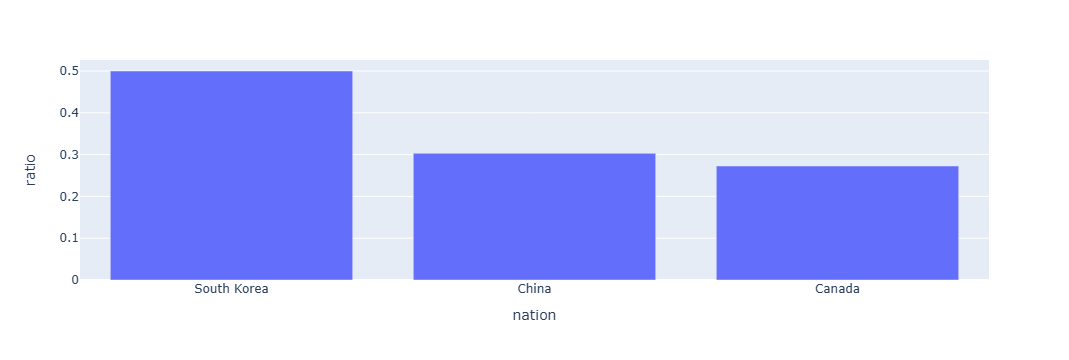

In [110]:
# 37. 국가별 금메달 비율
df_gold_ratio = df[df["medal"]=="gold"].copy()
df_gold_ratio["total"] = df.groupby("nation")["count"].transform("sum")
df_gold_ratio["ratio"] = df_gold_ratio["count"] / df_gold_ratio["total"]
px.bar(df_gold_ratio, x="nation", y="ratio")

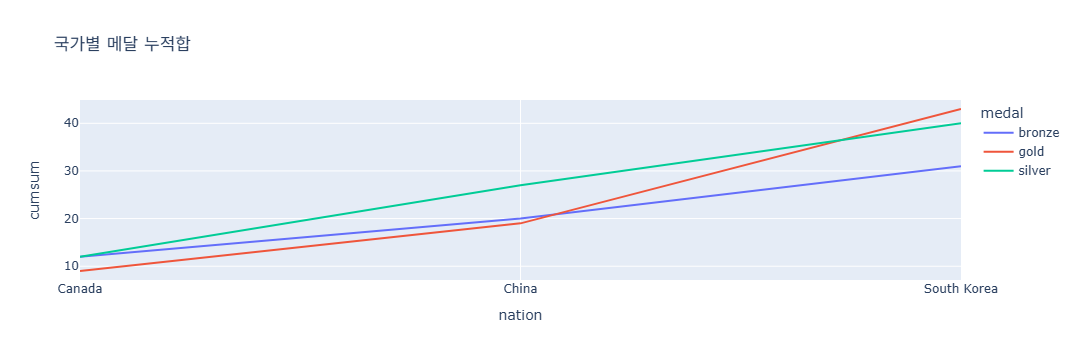

In [115]:
# 38. 메달별 국가별 누적선
df_sorted = df.sort_values(["medal", "nation"]).copy()
df_sorted["cumsum"] = df_sorted.groupby("medal")["count"].cumsum()
fig = px.line(df_sorted, x="nation", y="cumsum", color="medal", title="국가별 메달 누적합")
fig.show()


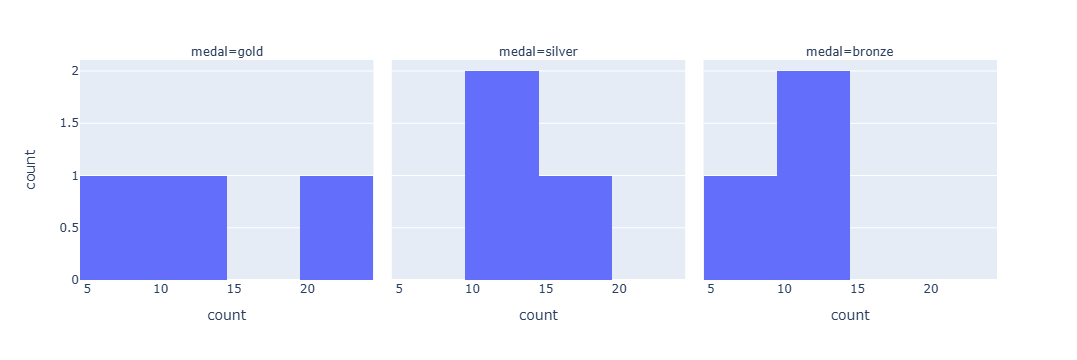

In [112]:
# 39. 메달별 분포 히스토그램
px.histogram(df, x="count", facet_col="medal")

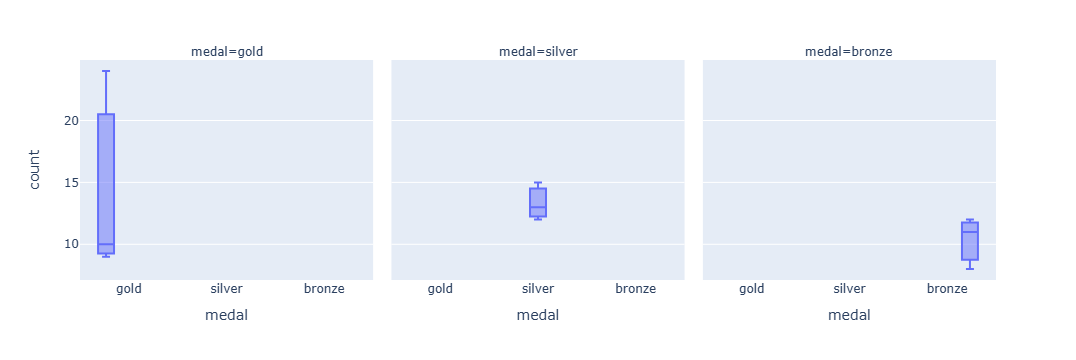

In [113]:
# 40. 메달별 분포 박스플롯
px.box(df, x="medal", y="count", facet_col="medal")

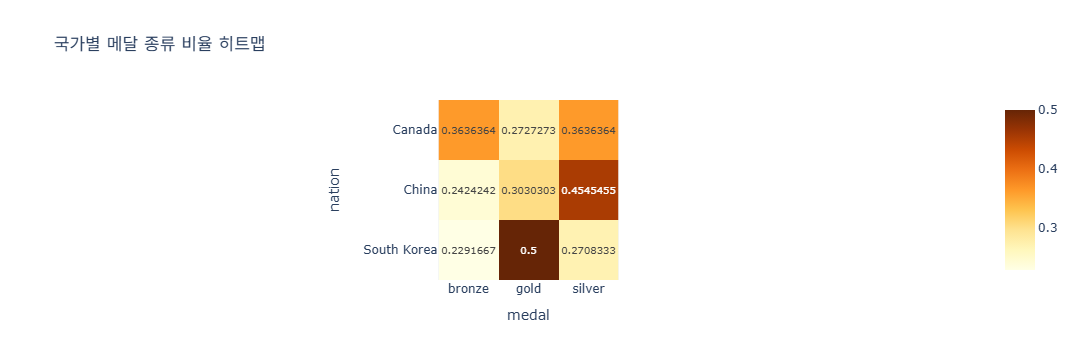

In [126]:
#41.메달 비율 히트맵(국가별 메달 종류 비율)
import plotly.express as px
import pandas as pd

# 데이터 불러오기
df = px.data.medals_long()

# 국가별 메달 비율 계산
df_ratio = df.copy()
df_ratio['total'] = df_ratio.groupby('nation')['count'].transform('sum')
df_ratio['ratio'] = df_ratio['count'] / df_ratio['total']

# 피벗 테이블로 변환
heatmap_data = df_ratio.pivot(index='nation', columns='medal', values='ratio')

# 히트맵 시각화
fig = px.imshow(
    heatmap_data,
    text_auto=True,
    color_continuous_scale='YlOrBr',
    title='국가별 메달 종류 비율 히트맵'
)
fig.show()

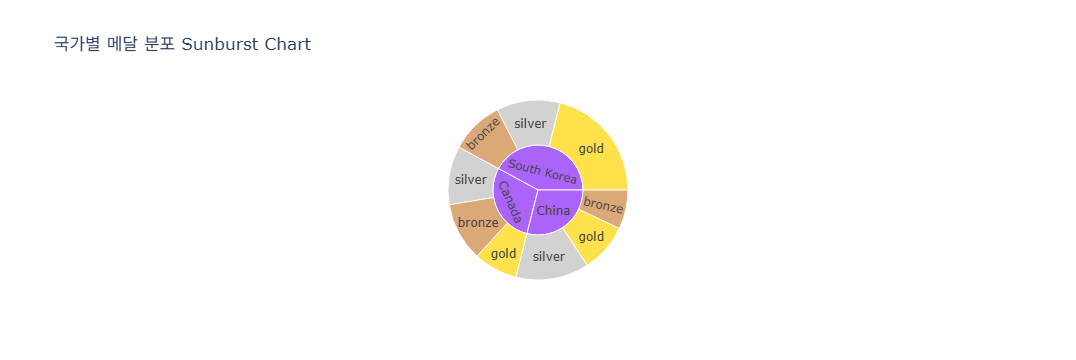

In [127]:
#42.Sunburst Chart (계층형 메달 분포)
fig = px.sunburst(
    df,
    path=['nation', 'medal'],
    values='count',
    color='medal',
    color_discrete_map={'gold': 'gold', 'silver': 'silver', 'bronze': 'peru'},
    title='국가별 메달 분포 Sunburst Chart'
)
fig.show()

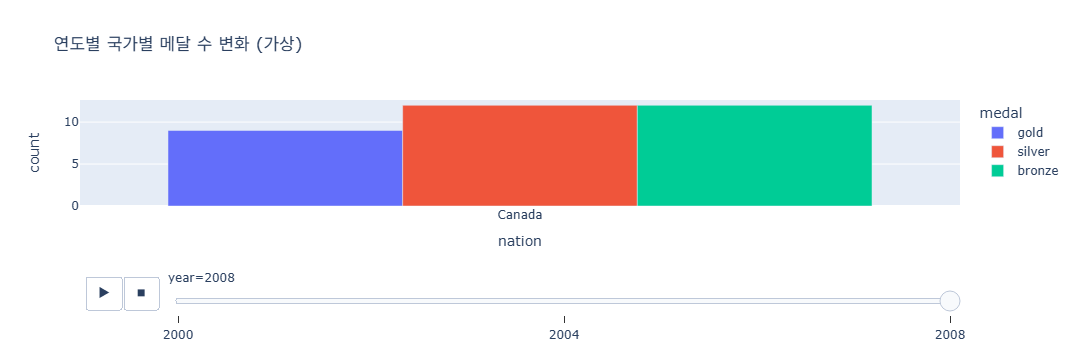

In [128]:
#43.애니메이션 바 차트 (가상 연도 기반)
import numpy as np

# 가상의 연도 추가
df_anim = df.copy()
df_anim['year'] = np.tile([2000, 2004, 2008], len(df)//3)

fig = px.bar(
    df_anim,
    x='nation',
    y='count',
    color='medal',
    animation_frame='year',
    barmode='group',
    title='연도별 국가별 메달 수 변화 (가상)'
)
fig.show()